# Multiple Regression

In [4]:
import matplotlib.pyplot as plt
import numpy as np 
import pandas as pd 
import pylab as pl 
from sklearn import linear_model
%matplotlib inline

In [5]:
df = pd.read_csv('FuelConsumption.csv')
df.head()

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2014,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,2014,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,2014,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,2014,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,2014,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


In [6]:
df.describe()

,MODELYEAR,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
count,1067.0,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000
mean,2014.0,3.346298,5.794752,13.296532,9.474602,11.580881,26.441425,256.228679
std,0.0,1.415895,1.797447,4.101253,2.794510,3.485595,7.468702,63.372304
min,2014.0,1.000000,3.000000,4.600000,4.900000,4.700000,11.000000,108.000000
25%,2014.0,2.000000,4.000000,10.250000,7.500000,9.000000,21.000000,207.000000
50%,2014.0,3.400000,6.000000,12.600000,8.800000,10.900000,26.000000,251.000000
75%,2014.0,4.300000,8.000000,15.550000,10.850000,13.350000,31.000000,294.000000
max,2014.0,8.400000,12.000000,30.200000,20.500000,25.800000,60.000000,488.000000


In [7]:
cdf = df[['ENGINESIZE' , 'CYLINDERS' , 'FUELCONSUMPTION_CITY','FUELCONSUMPTION_HWY','FUELCONSUMPTION_COMB'  , 'CO2EMISSIONS']]
cdf.head()

,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,CO2EMISSIONS
0,2.0,4,9.9,6.7,8.5,196
1,2.4,4,11.2,7.7,9.6,221
2,1.5,4,6.0,5.8,5.9,136
3,3.5,6,12.7,9.1,11.1,255
4,3.5,6,12.1,8.7,10.6,244


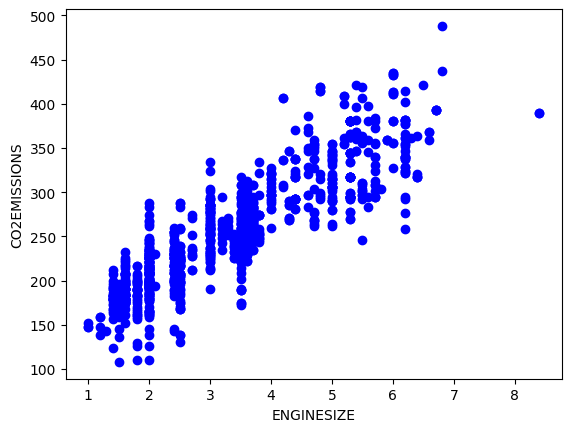

In [8]:
plt.scatter(cdf.ENGINESIZE , cdf.CO2EMISSIONS , color = 'blue')
plt.xlabel('ENGINESIZE')
plt.ylabel('CO2EMISSIONS')
plt.show()

In [10]:
mask = np.random.rand(len(df)) < 0.8
train = cdf[mask]
test = cdf [~mask]

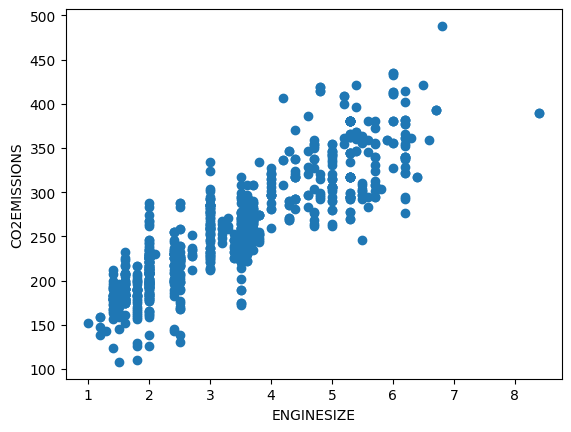

In [11]:
plt.scatter(train.ENGINESIZE , train.CO2EMISSIONS)
plt.xlabel('ENGINESIZE')
plt.ylabel('CO2EMISSIONS')
plt.show()

In [12]:
regr = linear_model.LinearRegression()
x = np.asanyarray(train[['ENGINESIZE' , 'CYLINDERS' , 'FUELCONSUMPTION_COMB']])
y = np.asanyarray(train[['CO2EMISSIONS']])
regr.fit(x,y)
coef = regr.coef_
intercept = regr.intercept_
print('coefficients : ' , coef)
print('intercept : ' , intercept)

coefficients :  [[9.7729288  8.67365543 9.43348176]]
intercept :  [63.80963751]


### ForeCast New Car 

In [17]:
new_car = [[1.5 , 4 , 5.9]]
predicted_Emissions = regr.predict(new_car)
print("Predicted Emissions:", predicted_Emissions[0][0])

Predicted Emissions: 168.82119477038185


In [13]:
y_hat = regr.predict(test[['ENGINESIZE' , 'CYLINDERS' , 'FUELCONSUMPTION_COMB']])
x = np.asanyarray(test[['ENGINESIZE' , 'CYLINDERS' , 'FUELCONSUMPTION_COMB']])
y = np.asanyarray(test[['CO2EMISSIONS']])
print('Mean :' , np.mean((y_hat - y)**2))
print('Variance Score :' , regr.score(x,y))

Mean : 503.69303642075033
Variance Score : 0.8725165612183475


C:\Users\sajjad\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2742: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(
